In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score1
import time
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Final_Data_S1= pd.read_csv("final_H358.csv")
Final_Data_S1.loc[Final_Data_S1[Final_Data_S1.labels.isin([ 2.0, 3.0,4.0])].index, 'labels']=1.0
ys = Final_Data_S1.labels
Xs= Final_Data_S1.drop(['Time', 'labels'], axis=1)

In [ ]:
train= pd.read_csv("train_data.csv")
test= pd.read_csv("test_data.csv")
train.loc[train[train.labels.isin([ 2.0])].index, 'labels']=1.0
test.loc[test[test.labels.isin([ 2.0])].index, 'labels']=1.0
yt = train.labels
Xt= train.drop([ 'labels'], axis=1)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(Xt, yt, test_size=0.9, stratify=yt,  random_state = 42)
X_train_t = X_train_t.to_numpy()
y_train_t= y_train_t.to_numpy()
y_test_t = test.labels
X_test_t = test.drop([ 'labels'], axis=1)

Base Model (Train only on source, test on target)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xs, ys)
y_pred =  clf.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('Weighted F1 score: ', f1_weighted)
print('ROC AUC score:', roc)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix no TL:")
print(cm)

accuracy: 0.7865168539325843
Weighted F1 score:  0.8331806198971103
ROC AUC score: 0.6231970312281193
precision: [0.77642276 0.9047619 ]
recall; [0.98963731 0.25675676]
fscore: [0.87015945 0.4       ]
support: [193  74]
Confusion Matrix no TL:
[[191   2]
 [ 55  19]]


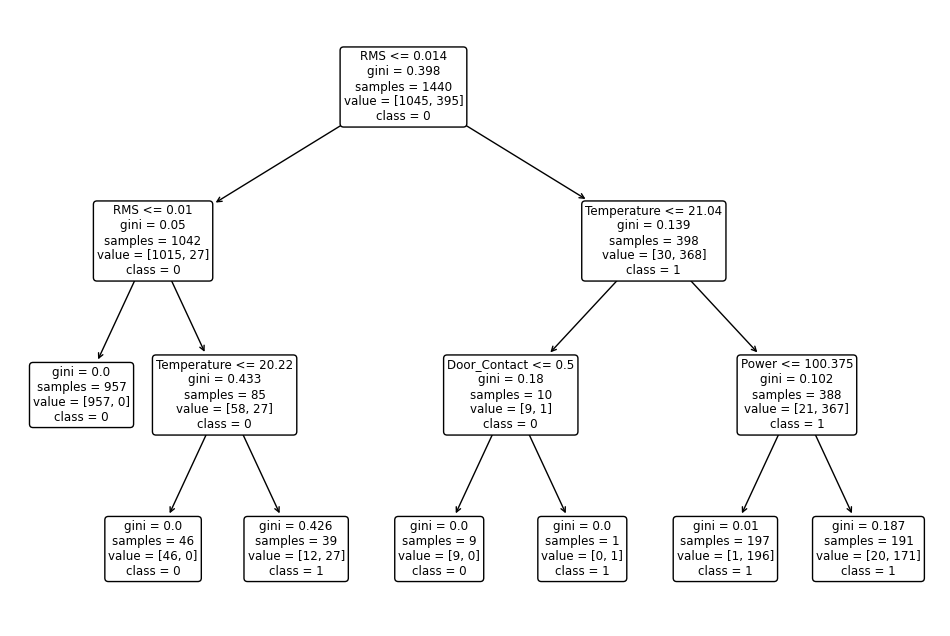

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()

Base Model (Train only on target, test on target)

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train_t, y_train_t)
y_pred =  model.predict(X_test_t)
precision, recall, fscore, support = score1(y_test_t, y_pred)
f1_weighted = f1_score(y_pred, y_test_t, average='weighted')
roc = roc_auc_score(y_test_t, y_pred)
print("accuracy:",accuracy_score(y_test_t, y_pred))
print('ROC AUC score:', roc)
print('Weighted F1 score: ', f1_weighted)
print('precision:', precision)
print('recall;', recall)
print('fscore:', fscore)
print('support:', support)
cm = confusion_matrix(y_test_t, y_pred)
print("Confusion Matrix no TL:")
print(cm)

accuracy: 0.898876404494382
ROC AUC score: 0.842564066657331
Weighted F1 score:  0.9026875238194959
precision: [0.89903846 0.89830508]
recall; [0.96891192 0.71621622]
fscore: [0.93266833 0.79699248]
support: [193  74]
Confusion Matrix no TL:
[[187   6]
 [ 21  53]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


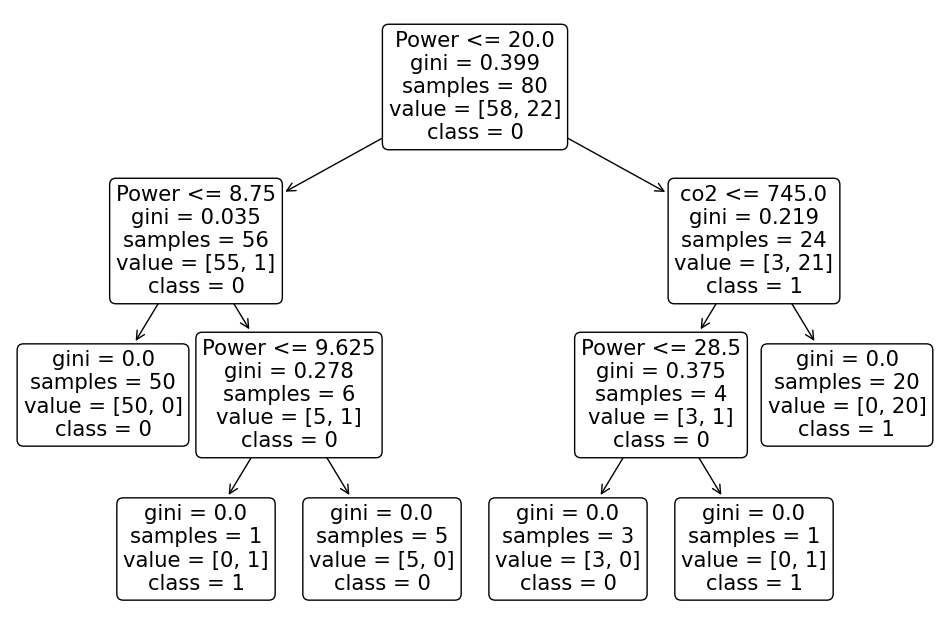

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['co2', 'Motion', 'RMS', 'Power', 'Temperature', 'Door_Contact', 'Window_Contact'], class_names=['0','1'], rounded=True)
plt.show()